## Jeremiah Lowhorn
## 4/13/2019
## INFS 770
## Assignment 4

In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.feature_extraction.text import *
from sklearn import metrics, model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize
import nltk
import gensim
from gensim.models import LdaModel
from sklearn import linear_model

Q1.Read the dataset (amazon_review_texts.csv) as a Pandas data frame. Please use Pandas’s read_csv method to read the dataset (see code in sanders data). Print the first 5 lines of the data frame. Write code to show the distribution (value counts) of the variable “score” (i.e., review scores). Write code to show the distribution of “category”

In [5]:
os.chdir('C:/Users/jlowh001/Desktop/INFS 770 Assignment 4')

In [6]:
df = pd.read_csv('amazon_review_texts.csv')

In [7]:
df.head()

,pid,helpful,score,text,category
0,B000GAYQL8,0/0,5,GREAT WATCH AND GREAT LOOK. BIG FACE AND 4 DIF...,watch
1,B000IBNPDA,0/0,5,"Bought this as a Christmas gift, my boyfriend ...",watch
2,B000J2HA16,0/0,5,"I love this watch! Its sporty, without looking...",watch
3,B000BDIQPM,0/0,5,"Works great,looks nice,dont have to worry abou...",watch
4,B000GZTH9E,0/3,4,I need to change the watch wrist and I havent ...,watch


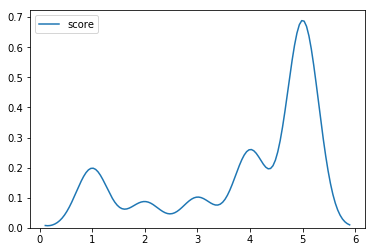

In [13]:
#kernel density estimate for amazon review texts score column
sns.kdeplot(df.score)

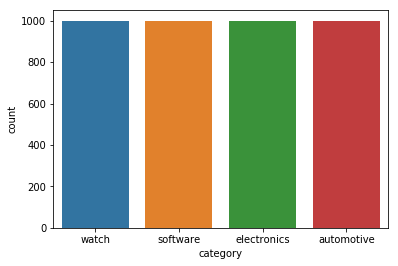

In [12]:
##counts of amazon review texts column category
sns.countplot(df.category)

Q2.	Please follow the code in “newsgroup” (please go to lecture 3/25 to download the latest version) and write code to tokenize the reviews. In the process, you need to 1) lowercase the tokens, 2) remove the stop words that are included in nltk.corpus.stopwords.words("english"), and 3) use nltk.stem.PorterStemmer() to do stemming. Please do this tokenization for each review in the “text” column (i.e., processed = list(map(preprocess, before_token(df_data1['text']))). Please calculate word frequency distribution. White code to print the top 10 frequent words (hint: use fdist.tabulate(10)). Create a text box and tell me which of the top 10 words might not be useful in text clustering and classification, and why?

In [17]:
# get a set of stopwords
stopwords = set(nltk.corpus.stopwords.words("english"))

import re
def before_token(documents):
    # conver words to lower case
    lower = map(str.lower, documents)
    # remove puntuations
    punctuationless = list(map(lambda x: " ".join(re.findall('\\b\\w\\w+\\b',x)), lower))
    # remove numbers
    return list(map(lambda x:re.sub('\\b[0-9]+\\b', '', x), punctuationless))

# initialize a stemmer
stemmer = nltk.stem.PorterStemmer()

# initialize a container of token frequencies
fdist = nltk.FreqDist()

# define a function that preprocess a single document and returns a list of tokens
def preprocess(doc):
    tokens = []
    for token in doc.split():
        if token not in stopwords:
            tokens.append(stemmer.stem(token))
    return tokens
            
# preprocess all documents
processed = list(map(preprocess, before_token(df.text)))
print(processed[0])

['great', 'watch', 'great', 'look', 'big', 'face', 'differ', 'mode', 'enough', 'sturdi', 'bright', 'indiglo', 'light', 'awesom', 'awesom', 'awesom', 'also', 'militari', 'guy', 'given', 'watch', 'battlefield', 'approv']


In [20]:
fdist = nltk.FreqDist([token for doc in processed for token in doc])

In [21]:
print("Unique tokens: %d" % fdist.B())
print("Total tokens: %d" % fdist.N())
print("Tokens occurred only once: %d" % len(fdist.hapaxes()))

Unique tokens: 10973
Total tokens: 193927
Tokens occurred only once: 4701


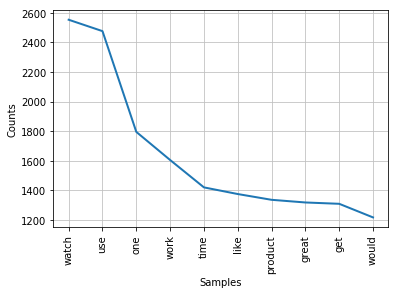

In [24]:
fdist.plot(10)

In [22]:
fdist.tabulate(10)

  watch     use     one    work    time    like product   great     get   would 
   2553    2476    1795    1605    1420    1375    1336    1318    1309    1217 


I can see all of these words being useful in classification and clustering except for work and use. Watch, time, and product have to do with the actual timepiece; would, get, like, and great have to do with the quality of the timepiece or the customer reccomending it to another person. 

Q3.	Reconstruct the documents (i.e., processed_doc = list(map(" ".join, processed))). Now processed_doc is a list of strings, each of which represents a document (i.e., a review). Vectorize all the documents using TfidfVectorizer (norm = ‘l2’) – you need to remove those tokens that appear in over 80% of the documents, and then do another round of stopword removal using the English stop words stored in scikit-learn. Please write code to print the numbers of features that were extracted by the TFIDF vectorizer.

In [25]:
processed_doc = list(map(" ".join, processed))

In [26]:
processed_doc

['great watch great look big face differ mode enough sturdi bright indiglo light awesom awesom awesom also militari guy given watch battlefield approv',
 'bought christma gift boyfriend love hesit buy want gunmet color watch one say black ion reciev inde gunmet color mani said great casual everyday watch amazon custom servic also excel work thank',
 'love watch sporti without look like tradit sport watch new everyday watch love',
 'work great look nice dont worri date use goe idl dont use time feel movement',
 'need chang watch wrist havent abl pl let know find one chang si unconfort use long period time',
 'much glorious inexpens item stark minim probabl would qualifi fashion statement simpl white face black numer rel attract comic san typefac watch strap rubber buy whole watch cheaper buy new strap case gave star anyth rave watch',
 'alway love movado design lost watch week ago tempt indulg howev look onlin chunkier movado band seem boyfriend eleg skagen year ago began look skagen fi

In [27]:
vectorizer = TfidfVectorizer(max_df=0.8, stop_words='english',norm='l2')
X = vectorizer.fit_transform(processed_doc)

In [29]:
print("n_samples: %d, n_features: %d" % X.shape)

n_samples: 4000, n_features: 10833


 Q4.  Use K-means clustering to categorize the documents into 4 clusters. Please print the top 10 representative words for each cluster (Please follow the sample code in “newsgroup” to write your code). Please create a text box to discuss how well you think these words describe the 4 product categories.

In [30]:
km = KMeans(n_clusters=4, max_iter=100, random_state=54321)
# km = KMeans(n_clusters=8, max_iter=100, random_state=54321)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=54321, tol=0.0001, verbose=0)

In [32]:
# examine the representative words for each cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print

Cluster 0:
 use
 product
 work
 great
 good
 instal
 program
 like
 softwar
 time
Cluster 1:
 batteri
 charg
 charger
 power
 adapt
 appl
 camera
 canon
 work
 origin
Cluster 2:
 watch
 look
 band
 time
 great
 wear
 love
 like
 nice
 price
Cluster 3:
 bed
 air
 inflat
 comfort
 pump
 sleep
 mattress
 deflat
 airb
 easi


Cluster 0 seems to be about the positive sentiment of the software, Cluster 1 seems to be about the charger and camera, cluster 3 is about the watch, how it loks and the price,  while cluster 4 is about air mattresses. Overall the clustering algorithm seems to have good separation between categories. 

Q5.  Build a topic model using Latent Dirichlet Allocation (LDA) and the vectorized data from Q3 (Please following the sample code in “topic modeling”) ( Please remember first to import genism and from gensim.models import LdaModel). Set the number of topics to 4. Print the topics (represented as linear functions of the words). Examine the representative words for each topic. Please create a text box and discuss how well these words describe the 4 product categories, and also tell me which unsupervised method (clustering vs LDA) you think is more effective in identifying the categories in this example and why?

In [35]:
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
id2word = dict((v,k) for k,v in vectorizer.vocabulary_.items())
print(id2word)

{4213: 'great', 10391: 'watch', 5555: 'look', 1175: 'big', 3531: 'face', 2733: 'differ', 6018: 'mode', 9080: 'sturdi', 1383: 'bright', 4801: 'indiglo', 5449: 'light', 963: 'awesom', 5933: 'militari', 4287: 'guy', 4086: 'given', 1080: 'battlefield', 759: 'approv', 1315: 'bought', 1834: 'christma', 4070: 'gift', 1331: 'boyfriend', 5575: 'love', 4463: 'hesit', 1501: 'buy', 10360: 'want', 4284: 'gunmet', 1994: 'color', 8181: 'say', 1204: 'black', 4985: 'ion', 7672: 'reciev', 4789: 'inde', 5704: 'mani', 8122: 'said', 1658: 'casual', 3394: 'everyday', 625: 'amazon', 2422: 'custom', 8353: 'servic', 3425: 'excel', 10640: 'work', 9454: 'thank', 8859: 'sporti', 5462: 'like', 9708: 'tradit', 8858: 'sport', 6301: 'new', 6321: 'nice', 2933: 'dont', 10669: 'worri', 2489: 'date', 10099: 'use', 4129: 'goe', 4669: 'idl', 9576: 'time', 3621: 'feel', 6106: 'movement', 6262: 'need', 1736: 'chang', 10696: 'wrist', 4380: 'havent', 353: 'abl', 7024: 'pl', 5414: 'let', 5252: 'know', 8463: 'si', 9926: 'unconfo

In [38]:
# build the lda model
lda = LdaModel(corpus, num_topics=4,id2word=id2word, passes=10)
print(lda.print_topics())

[(0, '0.002*"intex" + 0.002*"bed" + 0.001*"spark" + 0.001*"queen" + 0.001*"cannon" + 0.001*"grandson" + 0.001*"aerob" + 0.001*"twin" + 0.001*"washer" + 0.001*"civic"'), (1, '0.007*"watch" + 0.006*"use" + 0.006*"great" + 0.005*"work" + 0.005*"product" + 0.004*"good" + 0.004*"time" + 0.004*"like" + 0.004*"look" + 0.004*"batteri"'), (2, '0.007*"cap" + 0.003*"mop" + 0.002*"ga" + 0.002*"windshield" + 0.002*"wax" + 0.002*"cleaner" + 0.002*"bottl" + 0.001*"lock" + 0.001*"fuel" + 0.001*"la"'), (3, '0.007*"watch" + 0.002*"love" + 0.002*"charger" + 0.002*"mat" + 0.002*"gift" + 0.002*"look" + 0.002*"batteri" + 0.002*"skagen" + 0.001*"wear" + 0.001*"dent"')]


The first topic seems rather irratic, there is a combination of beds, cameras, grandson, washers, and what appears to be a Honda Civic. The second topic clearly talks about watches, the positive sentiment, and the battery. The third topic seems to be about cleaning supplies, but windshield ,lock, and fuel seem to be sprinkled in. The fourth topic again is very erratic, it is hard to understand what the clear separation is. LDA clearly performs more erratically than the k-means algorithm and does not produce categories that are very clear. 

Q6.	Perform a 5-fold cross validation using SGD classifier to predict the review scores using texts: Please first use TFIDF to vectorize the dataset again – this time you need to remove those tokens that appear in over 80% of the documents, remove those that appear just in 1 document, and also remove the English stop words. Please write code to show the number of features you obtain. For each fold, your code needs to output the classification report (precision, recall, f1-score and support by class), as well as the average f1-score across the 5 folders. 

In [42]:
skf = model_selection.StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(np.array(processed_doc), df.category):
    fold += 1
    print("Fold %d" % fold)
    # partition
    train_x, test_x = np.array(processed_doc)[train_index], np.array(processed_doc)[test_index]
    train_y, test_y = df.category[train_index], df.category[test_index]
    # vectorize
    vectorizer = TfidfVectorizer(max_df=0.8, stop_words='english',min_df =1)
    X = vectorizer.fit_transform(train_x)
    print("Number of features: %d" % len(vectorizer.vocabulary_))
    X_test = vectorizer.transform(test_x)
    # train model
    clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(X, train_y)
    # predict
    pred = clf.predict(X_test)
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print(line)

Fold 1
Number of features: 9610
              precision    recall  f1-score   support

  automotive       0.92      0.94      0.93       200
 electronics       0.90      0.90      0.90       200
    software       0.94      0.94      0.94       200
       watch       0.96      0.94      0.95       200

   micro avg       0.93      0.93      0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

Fold 2
Number of features: 9792
              precision    recall  f1-score   support

  automotive       0.89      0.92      0.90       200
 electronics       0.91      0.90      0.90       200
    software       0.94      0.94      0.94       200
       watch       0.94      0.94      0.94       200

   micro avg       0.92      0.92      0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800

Fold 3
Number of features: 9864
              precision    recall 

Q7.	Create a new variable named “satisfaction”. If a review score is 5 or 4, set the satisfaction value to 1 (the customer is satisfied). For the other review scores (3, 2, or 1), set the satisfaction value to 0 (the customer is not satisfied). Please try to figure out how to do this. For Q 7, 8 and 9, the dependent variable is now “satisfaction”. Use the same TFIDF vectorizer as in Q6 and perform a 5-fold cross validation to predict satisfaction using an SGD classifier. For each fold, your code needs to output the classification report (precision, recall, f1-score and support by class), as well as the average f1-score across the 5 folders. 

In [47]:
def sat_fun(row):
    if row['score'] >= 4:
        val = 1
    else:
        val = 0
    return val

df['satisfaction'] = df.apply(sat_fun, axis=1)
df.head(10)

,pid,helpful,score,text,category,satisfaction
0,B000GAYQL8,0/0,5,GREAT WATCH AND GREAT LOOK. BIG FACE AND 4 DIF...,watch,1
1,B000IBNPDA,0/0,5,"Bought this as a Christmas gift, my boyfriend ...",watch,1
2,B000J2HA16,0/0,5,"I love this watch! Its sporty, without looking...",watch,1
3,B000BDIQPM,0/0,5,"Works great,looks nice,dont have to worry abou...",watch,1
4,B000GZTH9E,0/3,4,I need to change the watch wrist and I havent ...,watch,1
5,B000GB0G7A,0/0,4,There is not much to this gloriously inexpensi...,watch,1
6,B0000643Q6,2-Feb,4,Have always loved Movado designs and when I lo...,watch,1
7,B000GAYQJK,0/0,5,this watch is cool you can switch the settings...,watch,1
8,B0002XV266,Apr-42,1,Materialism involves the importance one attach...,watch,0
9,B000E4ARN2,2-Jan,5,I bought this watch just a short time ago and ...,watch,1


In [48]:
skf = model_selection.StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(np.array(processed_doc), df.satisfaction):
    fold += 1
    print("Fold %d" % fold)
    # partition
    train_x, test_x = np.array(processed_doc)[train_index], np.array(processed_doc)[test_index]
    train_y, test_y = df.satisfaction[train_index], df.satisfaction[test_index]
    # vectorize
    vectorizer = TfidfVectorizer(max_df=0.8, stop_words='english',min_df =1)
    X = vectorizer.fit_transform(train_x)
    print("Number of features: %d" % len(vectorizer.vocabulary_))
    X_test = vectorizer.transform(test_x)
    # train model
    clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(X, train_y)
    # predict
    pred = clf.predict(X_test)
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print(line)

Fold 1
Number of features: 9722
              precision    recall  f1-score   support

           0       0.83      0.22      0.34       232
           1       0.75      0.98      0.85       569

   micro avg       0.76      0.76      0.76       801
   macro avg       0.79      0.60      0.60       801
weighted avg       0.78      0.76      0.71       801

Fold 2
Number of features: 9103
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       232
           1       0.87      0.83      0.85       569

   micro avg       0.79      0.79      0.79       801
   macro avg       0.75      0.76      0.75       801
weighted avg       0.80      0.79      0.79       801

Fold 3
Number of features: 9390
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       231
           1       0.88      0.85      0.86       569

   micro avg       0.81      0.81      0.81       800
   macro avg       0.77      0.7

Q8.	Use the opinion lexicon described in the lecture as the vocabulary, and vectorize the texts again.  Use TFIDF to vectorize the dataset again - you need to remove those tokens that appear in over 80% of the documents, remove those that appear just in 1 document, remove the English stop words, and also remember to change the parameter “vocabulary” in the TFIDF vectorizer. Perform a 5-fold cross validation to predict satisfaction using an SGD classifier. For each fold, your code needs to output the classification report (precision, recall, f1-score and support by class), as well as the average f1-score across the 5 folders. Create a textbox and tell me if the average F1 score has increased? If so, why? 

In [50]:
# read the lexicon
lexicon = dict()

# read postive words
with open("opinion-lexicon-English\\negative-words.txt", "r") as in_file:
    for line in in_file.readlines():
        if not line.startswith(";") and line != "\n":
            lexicon[line.strip()] = -1

# read negative words
with open("opinion-lexicon-English\\positive-words.txt", "r") as in_file:
    for line in in_file.readlines():
        if not line.startswith(";") and line != "\n":
            lexicon[line.strip()] = 1

# print the top 5 entries
for i, (k, v) in enumerate(lexicon.items()):
    print(k, v)
    if i > 4: break


2-faced -1
2-faces -1
abnormal -1
abolish -1
abominable -1
abominably -1


In [73]:
vocab = lexicon.keys()
skf = model_selection.StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(np.array(processed_doc), df.satisfaction):
    fold += 1
    print("Fold %d" % fold)
    # partition
    train_x, test_x = np.array(processed_doc)[train_index], np.array(processed_doc)[test_index]
    train_y, test_y = df.satisfaction[train_index], df.satisfaction[test_index]
    # vectorize
    vectorizer = TfidfVectorizer(max_df=0.8, stop_words='english',min_df =1, vocabulary=vocab)
    X = vectorizer.fit_transform(train_x)
    print("Number of features: %d" % len(vectorizer.vocabulary_))
    X_test = vectorizer.transform(test_x)
    # train model
    clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(X, train_y)
    # predict
    pred = clf.predict(X_test)
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print(line)

Fold 1
Number of features: 6786
              precision    recall  f1-score   support

           0       0.64      0.25      0.36       232
           1       0.76      0.94      0.84       569

   micro avg       0.74      0.74      0.74       801
   macro avg       0.70      0.60      0.60       801
weighted avg       0.72      0.74      0.70       801

Fold 2
Number of features: 6786
              precision    recall  f1-score   support

           0       0.69      0.52      0.59       232
           1       0.82      0.91      0.86       569

   micro avg       0.79      0.79      0.79       801
   macro avg       0.76      0.71      0.73       801
weighted avg       0.78      0.79      0.78       801

Fold 3
Number of features: 6786
              precision    recall  f1-score   support

           0       0.70      0.46      0.55       231
           1       0.81      0.92      0.86       569

   micro avg       0.79      0.79      0.79       800
   macro avg       0.75      0.6

It appears that by adding the positive-negative sentiment to the stochastic gradient descent classifier, the f1-score has decreased as compared to not using it. This would indcate that that lexicon is not indicative of a 4 or 5 score for positive words and a 3,2,1 score for negative words. This could be because some people score positively as a 3. 

Q9.  Use TFIDF to vectorize the dataset again using the same vectorizer you used in Q6 and then perform PCA variable reduction (Here you need to do vectorization first to obtain a dataset that includes the TF-IDF numbers. Then you do standardization and then PCA to obtain a new dataset that includes a new set of variables called principle components. Each principle component now includes a vector of numbers). Please create a textbox and use your own words to briefly describe PCA. 

Please write code to determine how many principle components you obtain if you make sure that these components explain at least 90% of variance. Print the number of components.  

Perform a 5-fold cross validation to predict satisfaction using an SGD classifier. Now, the independent variables are the principle components that can explain over 90% of the total variance, and the dependent variable is “satisfaction” (Here you don’t need to do vectorization again this model fitting step since you are dealing with a 2-d numpy array of numbers). For each fold, your code needs to output the classification report (precision, recall, f1-score and support by class), as well as the average f1-score across the 5 folders. Create a textbox and tell me if the average F1 score has increased? If so, why? 

In [76]:

#X_std = StandardScaler().fit_transform(X) # you need to do standardization, since pca is sensitive to the relative scaling of the original variables
vectorizer = TfidfVectorizer(max_df=0.8, stop_words='english',min_df =1)
X = vectorizer.fit_transform(df["text"]).todense()
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',whiten=True).fit(X)
print(pca.explained_variance_ratio_)
sumofvariance=0.0
n_components = 0
for item in pca.explained_variance_ratio_:
    sumofvariance += item
    n_components+=1
    #here is were we make sure the principal compenets explain over 90% of the variance
    if sumofvariance>=0.9:
        break
print(n_components)


[1.02386722e-02 3.73441300e-03 3.05396536e-03 ... 7.15916978e-41
 3.57119194e-42 1.01658875e-46]
2234


Principal component analysis works by grouping variables together into primary components that contribute to the explanation of the variance of the feature space. This technique is useful with large feature spaces because it can find the groups of variables that matter the most in the feature space thus reducing the complexity. 

In [81]:
pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X)
X_train_pca = pca.transform(X)


In [82]:
X_train_pca.shape

(4000, 2234)

In [83]:
df.shape

(4000, 6)

In [84]:
skf = model_selection.StratifiedKFold(n_splits=5)
fold = 0
for train_index, test_index in skf.split(np.array(X_train_pca), df.satisfaction):
    fold += 1
    print("Fold %d" % fold)
    # partition
    train_x, test_x = np.array(X_train_pca)[train_index], np.array(X_train_pca)[test_index]
    train_y, test_y = df.satisfaction[train_index], df.satisfaction[test_index]
    # train model
    clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(train_x, train_y)
    # predict
    pred = clf.predict(test_x)
    # classification results
    for line in metrics.classification_report(test_y, pred).split("\n"):
        print(line)

Fold 1
              precision    recall  f1-score   support

           0       0.58      0.12      0.21       232
           1       0.73      0.96      0.83       569

   micro avg       0.72      0.72      0.72       801
   macro avg       0.65      0.54      0.52       801
weighted avg       0.69      0.72      0.65       801

Fold 2
              precision    recall  f1-score   support

           0       0.38      0.16      0.22       232
           1       0.72      0.89      0.80       569

   micro avg       0.68      0.68      0.68       801
   macro avg       0.55      0.53      0.51       801
weighted avg       0.62      0.68      0.63       801

Fold 3
              precision    recall  f1-score   support

           0       0.56      0.22      0.31       231
           1       0.75      0.93      0.83       569

   micro avg       0.72      0.72      0.72       800
   macro avg       0.65      0.57      0.57       800
weighted avg       0.69      0.72      0.68       800

The f-1 score with principal component analysis has significantly decreased. 2200 plus principal components as determined by the initial step seems to be a bit large, if that was decreased then perhaps this model would perform better. 